C:\Users\xgabr\AppData\Local\Temp\ipykernel_27128\1916199321.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x, rotation=90)


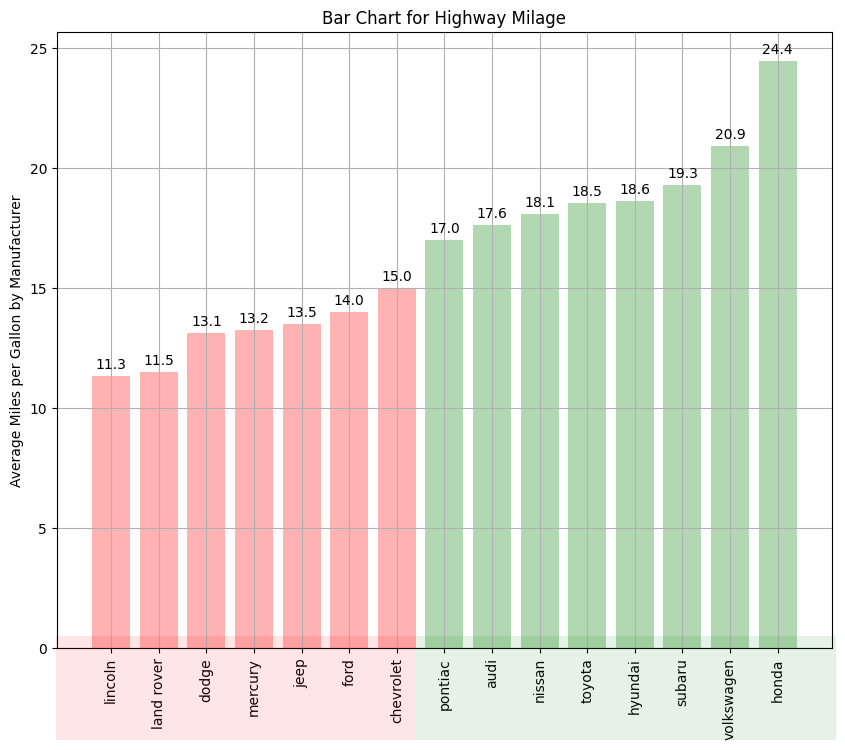

In [3]:
from imports import *
PATH = '../data/mpg_ggplot2.csv'
df = pd.read_csv(PATH)

# groupby and create the target x and y
gb_df = df.groupby(['manufacturer'])[['cyl', 'displ', 'cty']].mean()
gb_df.sort_values('cty', inplace=True)

x = gb_df.index
y = gb_df['cty']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()

for x_, y_ in zip(x, y):
    # this is very cool, since we can pass a function to matplotlib
    # and it will plot the color based on the result of the evaluation
    ax.bar(x_, y_, color = 'red' if y_ < y.mean() else 'green', alpha=0.3)
    
    # add some text
    ax.text(x_, y_ + 0.3, round(y_, 1), horizontalalignment = 'center')
    
p2 = patches.Rectangle((.124, -0.005), width= .36, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p2)

# green one
p1 = patches.Rectangle((.124 + .36, -0.005), width=.42, height=.13, alpha=.1, facecolor='green', transform = fig.transFigure)
fig.add_artist(p1)

# rotate the x ticks 90 degrees
ax.set_xticklabels(x, rotation=90)

# add an y label
ax.set_ylabel('Average Miles per Gallon by Manufacturer')

# set a title
ax.set_title('Bar Chart for Highway Milage')
plt.grid()